In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
involved_markers_heb_ta = pd.read_csv('./csv_tables/involved_markers_heb_ta.csv')
involved_markers_heb_ta['accident_date'] = pd.to_datetime(involved_markers_heb_ta['accident_date'])
involved_markers_heb_ta


C:\Users\itay8\AppData\Local\Temp\ipykernel_13860\4074794966.py:1: DtypeWarning: Columns (44,151) have mixed types. Specify dtype option on import or set low_memory=False.
  involved_markers_heb_ta = pd.read_csv('./csv_tables/involved_markers_heb_ta.csv')


,accident_id,provider_and_id,provider_code,file_type_police,involved_type,involved_type_hebrew,license_acquiring_date,age_group,age_group_hebrew,sex,...,vehicle_status,vehicle_status_hebrew,vehicle_attribution,vehicle_attribution_hebrew,seats,total_weight,total_weight_hebrew,vehicle_damage,vehicle_damage_hebrew,accident_date
0,2013001938,12013001938,1,1,1,נהג,1996,8,35-39,1.0,...,0.0,NaN,1.0,ישראלי,99.0,1.0,עד 1.9,1.0,קל,2013-07-31 02:00:00
1,2013001938,12013001938,1,1,3,נפגע,0,5,20-24,1.0,...,0.0,NaN,1.0,ישראלי,99.0,1.0,עד 1.9,1.0,קל,2013-07-31 02:00:00
2,2013002190,12013002190,1,1,1,נהג,0,99,לא ידוע,0.0,...,0.0,NaN,0.0,לא מנועי,99.0,0.0,לא ידוע,4.0,אין נזק,2013-03-14 02:30:00
3,2013002190,12013002190,1,1,1,נהג,0,99,לא ידוע,0.0,...,0.0,NaN,1.0,ישראלי,3.0,1.0,עד 1.9,4.0,אין נזק,2013-03-14 02:30:00
4,2023065778,32023065778,3,3,1,נהג,0,99,לא ידוע,0.0,...,0.0,NaN,1.0,ישראלי,3.0,2.0,2.0-2.9,4.0,אין נזק,2023-01-05 14:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103058,2023093433,32023093433,3,3,2,נהג נפגע,0,99,לא ידוע,0.0,...,0.0,NaN,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,2023-02-14 08:30:00
103059,2023099292,32023099292,3,3,1,נהג,2001,9,40-44,2.0,...,0.0,NaN,1.0,ישראלי,3.0,1.0,עד 1.9,4.0,אין נזק,2023-02-23 17:00:00
103060,2023092779,32023092779,3,3,1,נהג,0,99,לא ידוע,0.0,...,0.0,NaN,1.0,ישראלי,99.0,0.0,לא ידוע,1.0,קל,2023-01-24 23:15:00
103061,2023090298,32023090298,3,3,2,נהג נפגע,1995,10,45-49,2.0,...,0.0,NaN,1.0,ישראלי,3.0,1.0,עד 1.9,1.0,קל,2023-01-01 16:00:00


In [3]:
involved_markers_heb_ta['accident_date']

0        2013-07-31 02:00:00
1        2013-07-31 02:00:00
2        2013-03-14 02:30:00
3        2013-03-14 02:30:00
4        2023-01-05 14:15:00
                 ...        
103058   2023-02-14 08:30:00
103059   2023-02-23 17:00:00
103060   2023-01-24 23:15:00
103061   2023-01-01 16:00:00
103062   2023-03-05 20:30:00
Name: accident_date, Length: 103063, dtype: datetime64[ns]

In [4]:
involved_markers_heb_ta.columns.to_list()

['accident_id',
 'provider_and_id',
 'provider_code',
 'file_type_police',
 'involved_type',
 'involved_type_hebrew',
 'license_acquiring_date',
 'age_group',
 'age_group_hebrew',
 'sex',
 'sex_hebrew',
 'involve_vehicle_type',
 'involve_vehicle_type_hebrew',
 'safety_measures',
 'safety_measures_hebrew',
 'involve_yishuv_symbol',
 'involve_yishuv_name',
 'injury_severity',
 'injury_severity_hebrew',
 'injured_type',
 'injured_type_hebrew',
 'injured_position',
 'injured_position_hebrew',
 'population_type',
 'population_type_hebrew',
 'involve_home_region',
 'involve_home_region_hebrew',
 'involve_home_district',
 'involve_home_district_hebrew',
 'involve_home_natural_area',
 'involve_home_natural_area_hebrew',
 'involve_home_municipal_status',
 'involve_home_municipal_status_hebrew',
 'involve_home_yishuv_shape',
 'involve_home_yishuv_shape_hebrew',
 'hospital_time',
 'hospital_time_hebrew',
 'medical_type',
 'medical_type_hebrew',
 'release_dest',
 'release_dest_hebrew',
 'safety_me

In [5]:
involved_markers_heb_ta.columns[involved_markers_heb_ta.columns.str.contains('vehicle')]

Index(['involve_vehicle_type', 'involve_vehicle_type_hebrew', 'vehicle_status',
       'vehicle_status_hebrew', 'vehicle_attribution',
       'vehicle_attribution_hebrew', 'vehicle_damage',
       'vehicle_damage_hebrew'],
      dtype='object')

In [6]:
vehicle_type_na_idx = involved_markers_heb_ta['involve_vehicle_type'][involved_markers_heb_ta['involve_vehicle_type'].isna()].index
vehicle_type_na_idx

Int64Index([     7,     10,     29,     35,     37,     57,     69,     70,
                99,    108,
            ...
            102804, 102815, 102819, 102838, 102847, 102852, 102866, 102951,
            102998, 103053],
           dtype='int64', length=6675)

In [7]:
involved_markers_heb_ta.loc[vehicle_type_na_idx,'involve_vehicle_type_hebrew'].isna().sum()


6675

### Checking vehicle type and count of accidents by year

In [8]:
accident_year_counts = involved_markers_heb_ta.groupby(['accident_year','involve_vehicle_type_hebrew']).size().reset_index(name='counts')
accident_year_counts
accident_year_counts_pv = accident_year_counts.pivot(index='accident_year', columns='involve_vehicle_type_hebrew', values='counts')
accident_year_counts_pv

involve_vehicle_type_hebrew,אוטובוס,אוטובוס זעיר,"אופנוע 126 עד 400 סמ""ק","אופנוע 401+ סמ""ק","אופנוע 51 עד 125 סמ""ק","אופנוע עד 50 סמ""ק",אופניים,אופניים חשמליים,אחר ולא ידוע,טרקטור,...,משא 16.0 עד 33.9 טון,משא 3.6 עד 9.9 טון,משא 34.0+ טון,משא עד 3.5 טון - לא אחוד (טנדר),משא עד 3.5 טון - אחוד (טרנזיט),קורקינט חשמלי,קלנועית חשמלית,רכב נוסעים פרטי,רכב עבודה,רכבת
accident_year,,,,,,,,,,,,,,,,,,,,,
2013,1127.0,49.0,680.0,167.0,1226.0,125.0,429.0,33.0,762.0,5.0,...,72.0,137.0,14.0,160.0,423.0,30.0,10.0,6208.0,6.0,16.0
2014,1053.0,44.0,649.0,148.0,1036.0,95.0,501.0,124.0,664.0,15.0,...,53.0,116.0,12.0,115.0,320.0,26.0,10.0,5475.0,9.0,9.0
2015,966.0,38.0,680.0,188.0,1052.0,67.0,403.0,265.0,581.0,6.0,...,64.0,130.0,5.0,124.0,314.0,11.0,4.0,6006.0,9.0,13.0
2016,905.0,41.0,644.0,205.0,1007.0,62.0,414.0,366.0,553.0,9.0,...,55.0,90.0,6.0,73.0,259.0,23.0,10.0,5376.0,7.0,28.0
2017,863.0,43.0,591.0,212.0,915.0,84.0,328.0,469.0,531.0,13.0,...,47.0,104.0,5.0,103.0,196.0,48.0,4.0,4769.0,10.0,12.0
2018,960.0,41.0,528.0,203.0,808.0,53.0,184.0,438.0,460.0,7.0,...,51.0,80.0,5.0,79.0,166.0,117.0,7.0,4052.0,7.0,21.0
2019,1015.0,32.0,526.0,190.0,718.0,77.0,179.0,374.0,463.0,11.0,...,66.0,109.0,9.0,85.0,162.0,254.0,11.0,3975.0,10.0,17.0
2020,773.0,47.0,482.0,184.0,604.0,80.0,181.0,317.0,374.0,2.0,...,50.0,85.0,5.0,55.0,114.0,334.0,9.0,2980.0,7.0,2.0
2021,775.0,47.0,501.0,208.0,594.0,74.0,185.0,315.0,510.0,6.0,...,52.0,94.0,5.0,62.0,138.0,394.0,10.0,3075.0,10.0,2.0


In [9]:
accident_year_counts_pv['קורקינט חשמלי']

accident_year
2013     30.0
2014     26.0
2015     11.0
2016     23.0
2017     48.0
2018    117.0
2019    254.0
2020    334.0
2021    394.0
2022    371.0
2023     64.0
Name: קורקינט חשמלי, dtype: float64

In [10]:
accident_year_counts_pv['אופניים חשמליים']

accident_year
2013     33.0
2014    124.0
2015    265.0
2016    366.0
2017    469.0
2018    438.0
2019    374.0
2020    317.0
2021    315.0
2022    347.0
2023     48.0
Name: אופניים חשמליים, dtype: float64

In [11]:
accident_year_counts_pv['אופניים']

accident_year
2013    429.0
2014    501.0
2015    403.0
2016    414.0
2017    328.0
2018    184.0
2019    179.0
2020    181.0
2021    185.0
2022    190.0
2023     35.0
Name: אופניים, dtype: float64

### Observations:
**Bicycles**: Decrease over time, largest decrease 2018<br>
**Electrical Bicycles**: Increase from 2015 until 2019, then some small decrease<br>
**Scooter**: Increase, a jump at around 2019.<br>

Some thoughts:
* Is there an exchange between bicycles and electrical + scooter?
    * If there is an exchange can we/should we normalize it to the number of scooters/E.Bicycles?
    * What about normalizing to the number of people that live in the area?
* 2020 - 2021 was COVID, I need the months/weeks where enclosers were enforced and ignore these periods.
    * 25.3.2020  - 4.5.2020
    * 18.9.2020  – 17.10.2020 
    * 27.12.2020 – 7.2.2021 
* Are there streets in the data set?
    * If so, I can check accidents by street 
        * Some streets undergone changes getting the dates of work and seeing accidents before and after will be interesting ( also add photos)



### Comapring COVID encolder dates with previous years

In [12]:
pre_start_date = pd.to_datetime('2019-03-14')
pre_end_date = pd.to_datetime('2019-05-04')

COVID_start_date = pd.to_datetime('2020-03-14')
COVID_end_date = pd.to_datetime('2020-05-04')

after_start_date = pd.to_datetime('2022-03-14')
after_end_date = pd.to_datetime('2022-05-04')

pre_filtered_df = involved_markers_heb_ta[(involved_markers_heb_ta['accident_date'] >= pre_start_date) & (involved_markers_heb_ta['accident_date'] <= pre_end_date)]
COVID_filtered_df = involved_markers_heb_ta[(involved_markers_heb_ta['accident_date'] >= COVID_start_date) & (involved_markers_heb_ta['accident_date'] <= COVID_end_date)]
after_filtered_df = involved_markers_heb_ta[(involved_markers_heb_ta['accident_date'] >= after_start_date) & (involved_markers_heb_ta['accident_date'] <= after_end_date)]


pre_filtered_df.shape, COVID_filtered_df.shape, after_filtered_df.shape,

((1301, 160), (492, 160), (1151, 160))

In [13]:
pre_filtered_df.involve_vehicle_type_hebrew.value_counts()

רכב נוסעים פרטי                     591
אוטובוס                             137
אופנוע 51 עד 125 סמ"ק                93
אופנוע 126 עד 400 סמ"ק               69
אחר ולא ידוע                         61
מונית                                59
אופניים חשמליים                      46
אופניים                              26
משא עד 3.5 טון - אחוד (טרנזיט)       25
אופנוע 401+ סמ"ק                     22
קורקינט חשמלי                        21
משא עד 3.5  טון - לא אחוד (טנדר)     12
משא 3.6 עד 9.9 טון                   11
משא 16.0 עד 33.9 טון                  9
אופנוע עד 50 סמ"ק                     8
טרקטור                                5
רכבת                                  3
אוטובוס זעיר                          3
משא 34.0+ טון                         2
משא 12.1 עד 15.9 טון                  2
רכב עבודה                             2
קלנועית חשמלית                        1
משא 10.0 עד 12.0 טון                  1
Name: involve_vehicle_type_hebrew, dtype: int64

More accidents in COVID encloser time than I thought, so better check what I kind of vehicles participate.

In [14]:
COVID_filtered_df.involve_vehicle_type_hebrew.value_counts()

רכב נוסעים פרטי                     195
אופנוע 51 עד 125 סמ"ק                55
אופנוע 126 עד 400 סמ"ק               53
אחר ולא ידוע                         31
אוטובוס                              22
אופניים חשמליים                      21
משא עד 3.5 טון - אחוד (טרנזיט)       13
קורקינט חשמלי                        13
מונית                                12
אופניים                              10
משא 3.6 עד 9.9 טון                    8
אוטובוס זעיר                          6
משא עד 3.5  טון - לא אחוד (טנדר)      6
אופנוע 401+ סמ"ק                      5
אופנוע עד 50 סמ"ק                     5
משא 16.0 עד 33.9 טון                  3
קלנועית חשמלית                        2
רכב עבודה                             1
Name: involve_vehicle_type_hebrew, dtype: int64

In [15]:
after_filtered_df.involve_vehicle_type_hebrew.value_counts()

רכב נוסעים פרטי                     444
אוטובוס                             154
אופנוע 126 עד 400 סמ"ק               82
אופנוע 51 עד 125 סמ"ק                80
קורקינט חשמלי                        51
אופניים חשמליים                      50
מונית                                50
אחר ולא ידוע                         46
אופניים                              32
אופנוע 401+ סמ"ק                     27
משא עד 3.5 טון - אחוד (טרנזיט)       17
אופנוע עד 50 סמ"ק                    12
משא 3.6 עד 9.9 טון                   10
משא עד 3.5  טון - לא אחוד (טנדר)      4
רכבת                                  4
משא 16.0 עד 33.9 טון                  4
משא 34.0+ טון                         2
קלנועית חשמלית                        2
אוטובוס זעיר                          1
טרקטור                                1
משא 12.1 עד 15.9 טון                  1
Name: involve_vehicle_type_hebrew, dtype: int64

Scooter and E.bicycles are not that few, and even more compared to pre COVID on scooter.

So it might be more interesting what kind of accidents 

In [16]:
pre_filtered_df[(pre_filtered_df.involve_vehicle_type == 21) | (pre_filtered_df.involve_vehicle_type == 23)].accident_type.value_counts()

4     24
2     15
3     11
15     5
1      3
5      2
18     2
11     2
13     2
10     1
Name: accident_type, dtype: int64

In [17]:
pre_filtered_df[(pre_filtered_df.involve_vehicle_type == 21) | (pre_filtered_df.involve_vehicle_type == 23)].accident_severity.value_counts()

3    64
2     3
Name: accident_severity, dtype: int64

Severity is light

-----------------

Next lets check streets that accidents happened

In [18]:
filtered_1 = pre_filtered_df[(pre_filtered_df.involve_vehicle_type == 21) | (pre_filtered_df.involve_vehicle_type == 23)]
filtered_2 = COVID_filtered_df[(COVID_filtered_df.involve_vehicle_type == 21) | (COVID_filtered_df.involve_vehicle_type == 23)]
filtered_3 = after_filtered_df[(after_filtered_df.involve_vehicle_type == 21) | (after_filtered_df.involve_vehicle_type == 23)]
concatenated_df = pd.concat([filtered_1, filtered_2, filtered_3])

In [19]:
filtered_1.street1_hebrew.value_counts()

דרך שלמה          4
דרך בגין          4
התקוה             3
ארלוזורוב         3
קבוץ גלויות       2
שד רוקח           2
שד ירושלים        2
אלנבי             2
הרצל              2
לה גארדיה         2
אבן גבירול        2
לח"י              2
קמואל             1
המרד              1
דיזנגוף           1
נחלת בנימין       1
אשכול לוי         1
העליה             1
שד נורדאו         1
שד הבעש"ט         1
הנביאים           1
עלית הנוער        1
דרך נמיר מרדכי    1
שד יהודית         1
ויצמן             1
הכובשים           1
לבנון חיים        1
הוברמן            1
המלך ג'ורג'       1
פנקס              1
לוינסקי           1
יבנה              1
שד רוטשילד        1
קרליבך            1
דרך ההגנה         1
ראש פינה          1
הוז דב            1
חבשוש חיים        1
אלון יגאל         1
צ'לנוב            1
אילת              1
מעפילי אגוז       1
דרך יפו           1
בן יהודה          1
וינגייט           1
ריינס             1
יפת               1
רוזן פנחס         1
Name: street1_hebrew, dtype: int64

In [20]:
filtered_2.street1_hebrew.value_counts()

יפת             3
שד רוקח         2
שד ירושלים      2
הכובשים         2
דרך בגין        2
יצחק שדה        1
קבוץ גלויות     1
מרגולין         1
לה גארדיה       1
ערבי נחל        1
אלון יגאל       1
לוינסקי         1
ויצמן           1
שלבים           1
שוקן            1
דרך דיין משה    1
אבן גבירול      1
נס לגויים       1
המסגר           1
מעפילי אגוז     1
דעואל           1
דרך ההגנה       1
עגנון ש"י       1
דרך יפו         1
נירים           1
החשמונאים       1
טרומפלדור       1
יסוד המעלה      1
Name: street1_hebrew, dtype: int64

In [21]:
filtered_3.longitude


93510     34.783767
94200     34.799163
94206     34.773456
94320     34.841976
94339     34.773456
            ...    
101629    34.769454
101684    34.792037
101850    34.790842
101926    34.800510
101975    34.786508
Name: longitude, Length: 101, dtype: float64

In [22]:
# Step 3: Get the count of repeated streets
street_counts = concatenated_df.street1_hebrew.value_counts()
street_counts

דרך בגין       10
שד רוקח         9
קבוץ גלויות     9
אלון יגאל       7
לה גארדיה       7
               ..
נס לגויים       1
ערבי נחל        1
מרגולין         1
יסוד המעלה      1
קפלן            1
Name: street1_hebrew, Length: 97, dtype: int64

Kinda hard to understand the accident simply by street, so lets plot the longitude and latitude

In [23]:
!pip install folium

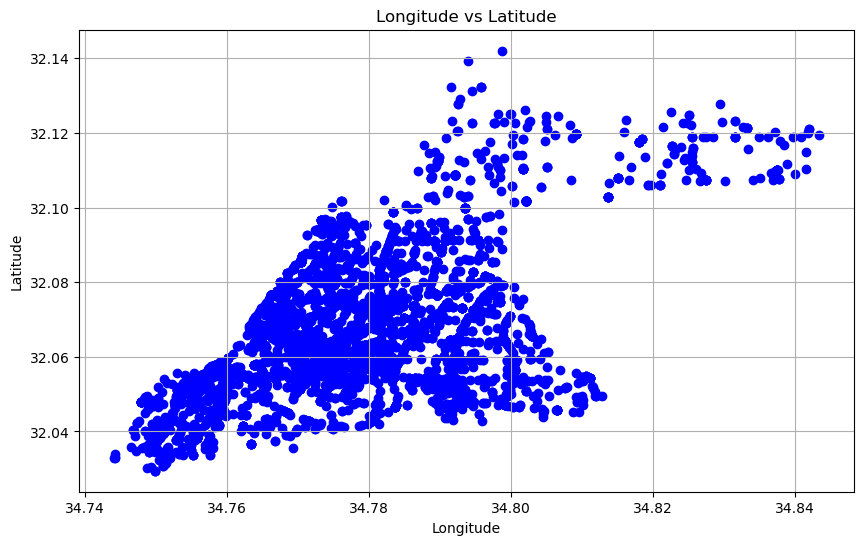

In [24]:
longitude = involved_markers_heb_ta[(involved_markers_heb_ta.involve_vehicle_type == 21) | (involved_markers_heb_ta.involve_vehicle_type == 23)].longitude
latitude = involved_markers_heb_ta[(involved_markers_heb_ta.involve_vehicle_type == 21) | (involved_markers_heb_ta.involve_vehicle_type == 23)].latitude
plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, c='blue', marker='o')  # Plot the points
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Longitude vs Latitude')
plt.grid(True)
plt.show()

In [25]:
involved_markers_heb_ta.involve_yishuv_name.value_counts()

תל אביב -יפו    33230
חולון            5089
בת ים            4413
רמת גן           3682
ראשון לציון      3445
                ...  
מחנה הילה*          1
בית רימון           1
בית השיטה           1
עמינדב              1
כרמייה              1
Name: involve_yishuv_name, Length: 940, dtype: int64

In [26]:
year = 2020
vehicle_type = 21 # scooter
longitude = involved_markers_heb_ta[(involved_markers_heb_ta.involve_vehicle_type == vehicle_type) &(involved_markers_heb_ta.accident_date.dt.year == year)].longitude.dropna()
latitude = involved_markers_heb_ta[(involved_markers_heb_ta.involve_vehicle_type == vehicle_type) & (involved_markers_heb_ta.accident_date.dt.year == year)].latitude.dropna()

In [27]:
longitude.shape

(334,)

In [78]:
year = 2021
vehicle_type = 21 # scooter
longitude = involved_markers_heb_ta[(involved_markers_heb_ta.involve_vehicle_type == vehicle_type) &(involved_markers_heb_ta.accident_date.dt.year == year)].longitude.dropna()
latitude = involved_markers_heb_ta[(involved_markers_heb_ta.involve_vehicle_type == vehicle_type) & (involved_markers_heb_ta.accident_date.dt.year == year)].latitude.dropna()
print(longitude.shape)
import folium

# Create a base map
m = folium.Map(location=[32.05, 34.8], zoom_start=13)  # Use the average latitude and longitude for centering the map


# Add points to the map
for lat, lon in zip(latitude, longitude):
    folium.CircleMarker([lat, lon], radius=5).add_to(m)

# Display the map in Jupyter notebook
m


(394,)


In [32]:
involved_markers_heb_ta['accident_year'] = involved_markers_heb_ta.accident_date.dt.year

0         2013
1         2013
2         2013
3         2013
4         2023
          ... 
103058    2023
103059    2023
103060    2023
103061    2023
103062    2023
Name: accident_year, Length: 103063, dtype: int64

In [52]:
# Grouping by accident_year and street1_hebrew, then sorting to get the top 5 streets for each year
top_streets_per_year = involved_markers_heb_ta[involved_markers_heb_ta.involve_vehicle_type == 21].groupby(['accident_year', 'street1_hebrew'])['involved_type']\
                           .count().reset_index()

# Function to get top 5 streets for each year
def get_top_streets(year):
    return top_streets_per_year[top_streets_per_year['accident_year'] == year]\
           .sort_values(by='involved_type', ascending=False)\
           .head(5)

# Getting top 5 streets for each year
top_streets_all_years = pd.concat([get_top_streets(year) for year in involved_markers_heb_ta['accident_year'].unique()])

top_streets_all_years


,accident_year,street1_hebrew,involved_type
17,2013,קרן קיימת לישראל,3
13,2013,עזה,2
4,2013,ארלוזורוב,2
9,2013,דרך שלמה,2
1,2013,אלון יגאל,2
734,2023,אבן גבירול,6
745,2023,דרך ההגנה,2
759,2023,מרמורק,2
758,2023,מלכי ישראל,2
765,2023,קבוץ גלויות,2


In [73]:
import plotly.express as px

top_streets_2017_2023 = top_streets_all_years[top_streets_all_years.accident_year >2016]

# Creating the grouped bar chart
fig = px.bar(top_streets_2017_2023,
             x='accident_year',
             y='involved_type',
             color='street1_hebrew',
             barmode='group',  # This sets the bars to be grouped
             labels={'accident_year': 'Year', 'involved_type': 'Number of Accidents'},
             title='Accidents Count by Year for Top Streets',
             color_discrete_sequence=px.colors.qualitative.Dark24)

# Adjusting the layout
fig.update_layout(legend_title_text='Street Name')

# Displaying the plot
fig.show()
